# **1. Data Preprocessing**

In [1]:
# Importing needed libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Importing needed dataset.
df = pd.read_csv('imdb.csv')
df.head(5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,FilmNoir,GameShow,History,Horror,Music,Musical,Mystery,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550,3240,1921,video.movie,1,0,19,96,85,3,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319,5700,1925,video.movie,2,1,35,110,122,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007,9180,1927,video.movie,3,4,67,428,376,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521,6420,1926,video.movie,1,1,53,123,219,3,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057,5220,1931,video.movie,2,0,38,187,186,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [2]:
# No of null elements in dataset per column
df.isnull().sum()

fn                      0
tid                     0
title                   0
wordsInTitle           13
url                     0
imdbRating           1179
ratingCount          1206
duration             1031
year                   45
type                    4
nrOfWins                1
nrOfNominations         0
nrOfPhotos              0
nrOfNewsArticles        0
nrOfUserReviews         0
nrOfGenre               0
Action                  0
Adult                   0
Adventure               0
Animation               0
Biography               0
Comedy                  0
Crime                   0
Documentary             0
Drama                   0
Family                  0
Fantasy                 0
FilmNoir                0
GameShow                0
History                 0
Horror                  0
Music                   0
Musical                 0
Mystery                 0
News                    0
RealityTV               0
Romance                 0
SciFi                   0
Short       

In [3]:
# Dropping unwanted columns from the dataset.
df = df.drop(columns=['fn', 'tid', 'title', 'wordsInTitle', 'url', 'year', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47'], axis=1)
df.shape

(14761, 38)

In [4]:
# This below one line of code is used to avoid SettingWithCopying Warning.
pd.options.mode.chained_assignment = None

#Missing value treatment.
df['type'].fillna('video.movie',inplace=True)
df['nrOfWins'].fillna('0', inplace=True)

def duration_ratingCount_imdbRating_MissingValueTreatment():
  for i in range(len(df)):
    if not (str(df['duration'][i])).isdigit():
      df['duration'][i] = '0'
    
    if not (str(df['ratingCount'][i])).isdigit():
      df['ratingCount'][i] = '0'

    if len(str(df['imdbRating'][i])) > 3 or str(df['imdbRating'][i]) == 'nan':
      df['imdbRating'][i] = '0'

  df['duration'] = df['duration'].astype(str).astype(int)
  duration_Mean = df['duration'].mean()
  df['duration'].replace({0:duration_Mean}, inplace=True)

  df['ratingCount'] = df['ratingCount'].astype(str).astype(int)
  ratingCount_Mean = df['ratingCount'].mean()
  df['ratingCount'].replace({0:ratingCount_Mean}, inplace=True)

  df['imdbRating'] = df['imdbRating'].astype(str).astype(float)
  imdbRating_Mean = df['imdbRating'].mean()
  df['imdbRating'].replace({0:imdbRating_Mean}, inplace=True)

duration_ratingCount_imdbRating_MissingValueTreatment()
df.isnull().sum()

imdbRating          0
ratingCount         0
duration            0
type                0
nrOfWins            0
nrOfNominations     0
nrOfPhotos          0
nrOfNewsArticles    0
nrOfUserReviews     0
nrOfGenre           0
Action              0
Adult               0
Adventure           0
Animation           0
Biography           0
Comedy              0
Crime               0
Documentary         0
Drama               0
Family              0
Fantasy             0
FilmNoir            0
GameShow            0
History             0
Horror              0
Music               0
Musical             0
Mystery             0
News                0
RealityTV           0
Romance             0
SciFi               0
Short               0
Sport               0
TalkShow            0
Thriller            0
War                 0
Western             0
dtype: int64

In [5]:
# Identify datatypes of each column
df.dtypes

imdbRating          float64
ratingCount         float64
duration            float64
type                 object
nrOfWins             object
nrOfNominations      object
nrOfPhotos           object
nrOfNewsArticles     object
nrOfUserReviews       int64
nrOfGenre             int64
Action                int64
Adult                 int64
Adventure             int64
Animation             int64
Biography             int64
Comedy                int64
Crime                 int64
Documentary           int64
Drama                 int64
Family                int64
Fantasy               int64
FilmNoir              int64
GameShow              int64
History               int64
Horror                int64
Music                 int64
Musical               int64
Mystery               int64
News                  int64
RealityTV             int64
Romance               int64
SciFi                 int64
Short                 int64
Sport                 int64
TalkShow              int64
Thriller            

In [6]:
# Getting information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14761 entries, 0 to 14760
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   imdbRating        14761 non-null  float64
 1   ratingCount       14761 non-null  float64
 2   duration          14761 non-null  float64
 3   type              14761 non-null  object 
 4   nrOfWins          14761 non-null  object 
 5   nrOfNominations   14761 non-null  object 
 6   nrOfPhotos        14761 non-null  object 
 7   nrOfNewsArticles  14761 non-null  object 
 8   nrOfUserReviews   14761 non-null  int64  
 9   nrOfGenre         14761 non-null  int64  
 10  Action            14761 non-null  int64  
 11  Adult             14761 non-null  int64  
 12  Adventure         14761 non-null  int64  
 13  Animation         14761 non-null  int64  
 14  Biography         14761 non-null  int64  
 15  Comedy            14761 non-null  int64  
 16  Crime             14761 non-null  int64 

In [7]:
# Getting information about interger types of data in the dataframe
df.describe()

,imdbRating,ratingCount,duration,nrOfUserReviews,nrOfGenre,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,FilmNoir,GameShow,History,Horror,Music,Musical,Mystery,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
count,14761.000000,1.476100e+04,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000
mean,6.782741,2.622587e+04,5780.734244,103.616828,4.493259,0.521916,0.060091,0.120995,0.071201,0.043087,0.351196,0.146399,0.081770,0.407899,0.081295,0.059278,0.014565,0.012736,0.038751,0.069778,0.038073,0.026014,0.065578,0.011991,0.008671,0.122553,0.070117,0.038209,0.016530,0.035838,0.088612,0.032450,0.022424
std,1.083996,6.192746e+04,7428.536739,233.638777,28.557195,17.680075,4.289299,0.328615,0.257169,0.203059,0.477360,0.353518,0.274023,0.491461,0.273297,0.236152,0.119809,0.112138,0.193007,0.254782,0.191380,0.159184,0.247552,0.108849,0.092719,0.327934,0.255353,0.191706,0.127506,0.185892,0.284192,0.177199,0.148063
min,1.000000,4.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.116442,7.820000e+02,4080.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.900000,5.698000e+03,5580.000000,29.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.600000,2.370171e+04,6600.000000,102.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.900000,1.183395e+06,379114.000000,4928.000000,1547.000000,1930.000000,488.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# variable Encoding - Converting categorical variables into integers.

labelencoder_df = LabelEncoder()
df['type'] = labelencoder_df.fit_transform(df['type'])
df['nrOfWins'] = labelencoder_df.fit_transform(df['nrOfWins'])
df['nrOfNominations'] = labelencoder_df.fit_transform(df['nrOfNominations'])
df['nrOfPhotos'] = labelencoder_df.fit_transform(df['nrOfPhotos'])
df['nrOfNewsArticles'] = labelencoder_df.fit_transform(df['nrOfNewsArticles'])

df.dtypes

imdbRating          float64
ratingCount         float64
duration            float64
type                  int64
nrOfWins              int64
nrOfNominations       int64
nrOfPhotos            int64
nrOfNewsArticles      int64
nrOfUserReviews       int64
nrOfGenre             int64
Action                int64
Adult                 int64
Adventure             int64
Animation             int64
Biography             int64
Comedy                int64
Crime                 int64
Documentary           int64
Drama                 int64
Family                int64
Fantasy               int64
FilmNoir              int64
GameShow              int64
History               int64
Horror                int64
Music                 int64
Musical               int64
Mystery               int64
News                  int64
RealityTV             int64
Romance               int64
SciFi                 int64
Short                 int64
Sport                 int64
TalkShow              int64
Thriller            

In [9]:
df.head(2)

,imdbRating,ratingCount,duration,type,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,FilmNoir,GameShow,History,Horror,Music,Musical,Mystery,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,8.4,40550.0,3240.0,119,1,0,103,1532,85,3,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8.3,45319.0,5700.0,119,41,1,186,68,122,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# Normalization - MinMaxScaler - To scale all values into same range.

minmaxscaler_df = MinMaxScaler()
df = minmaxscaler_df.fit_transform(df)

df = pd.DataFrame(df,columns=['imdbRating', 'ratingCount', 'duration', 'type', 'nrOfWins',
       'nrOfNominations', 'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews',
       'nrOfGenre', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western'])

df.head(2)

,imdbRating,ratingCount,duration,type,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,FilmNoir,GameShow,History,Horror,Music,Musical,Mystery,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,0.831461,0.034263,0.008541,0.991667,0.007576,0.000000,0.31307,0.982051,0.017248,0.001939,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.820225,0.038293,0.015030,0.991667,0.310606,0.006579,0.56535,0.043590,0.024756,0.001939,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **2. Data Visualization**

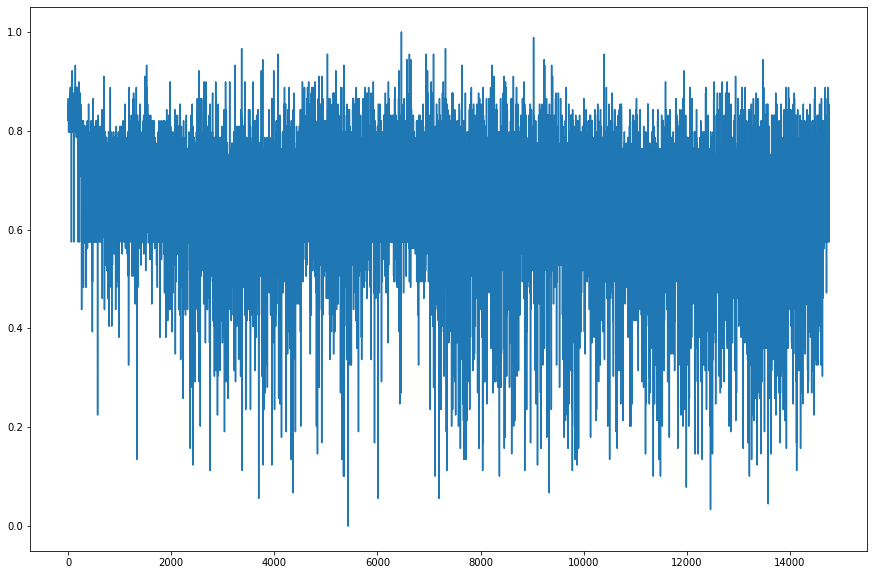

In [11]:
# Line Graph
plt.figure(figsize=(15,10))
plt.plot(df['imdbRating'])
plt.show()

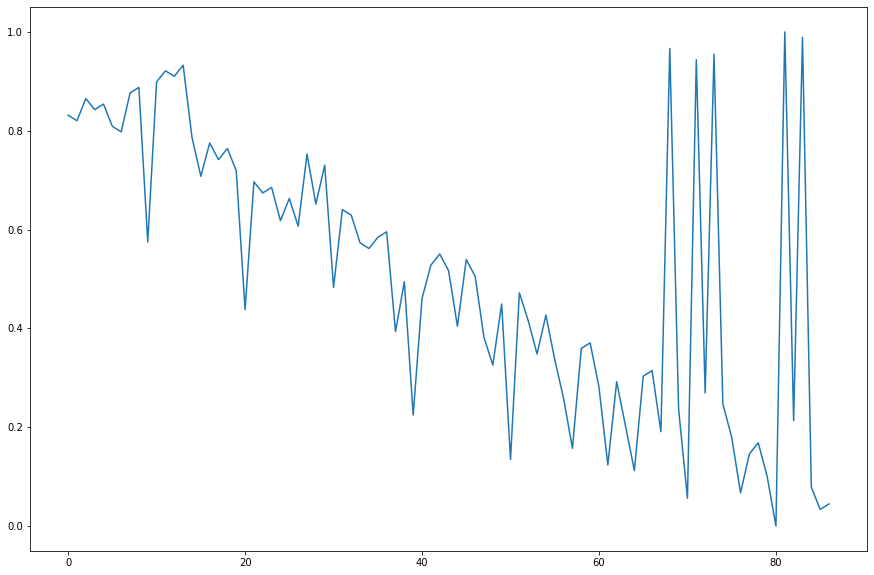

In [12]:
plt.figure(figsize=(15,10))
plt.plot(df['imdbRating'].unique())
plt.show()

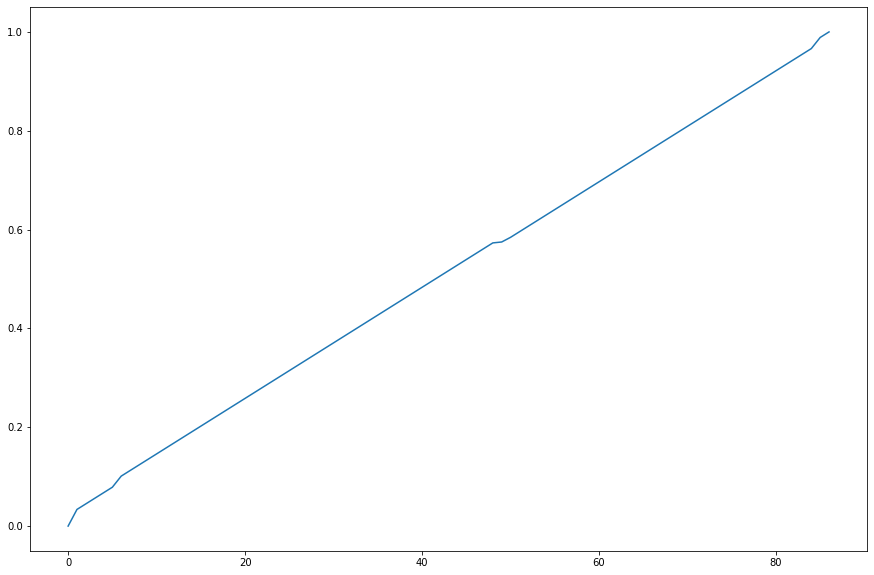

In [13]:
plt.figure(figsize=(15,10))
plt.plot(df['imdbRating'].sort_values().unique())
plt.show()

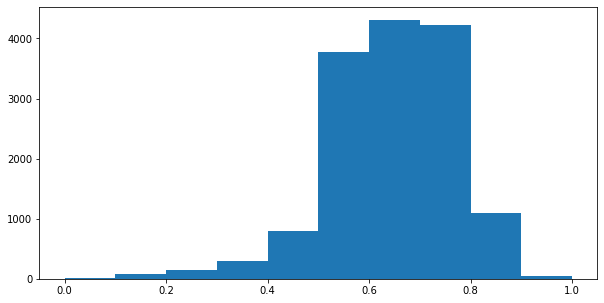

In [14]:
# Histogram
plt.figure(figsize=(10,5))
plt.hist(df['imdbRating'])
plt.show()

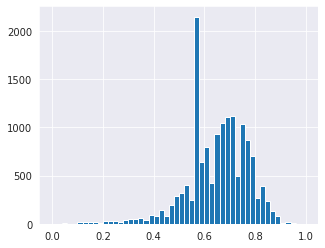

In [15]:
plt.figure(figsize=(5,4))
sns.set_style('darkgrid')

plt.hist(df['imdbRating'], bins=50)
plt.show()

No handles with labels found to put in legend.


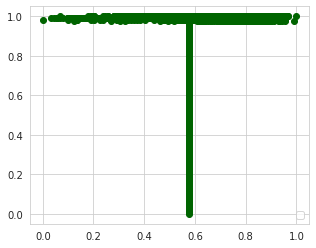

In [16]:
# Scatter Plot
plt.figure(figsize=(5,4))
sns.set_style('whitegrid')

plt.scatter(x = df['imdbRating'], y = df['type'], marker='o', c='darkgreen')

plt.legend(loc=4)
plt.show()

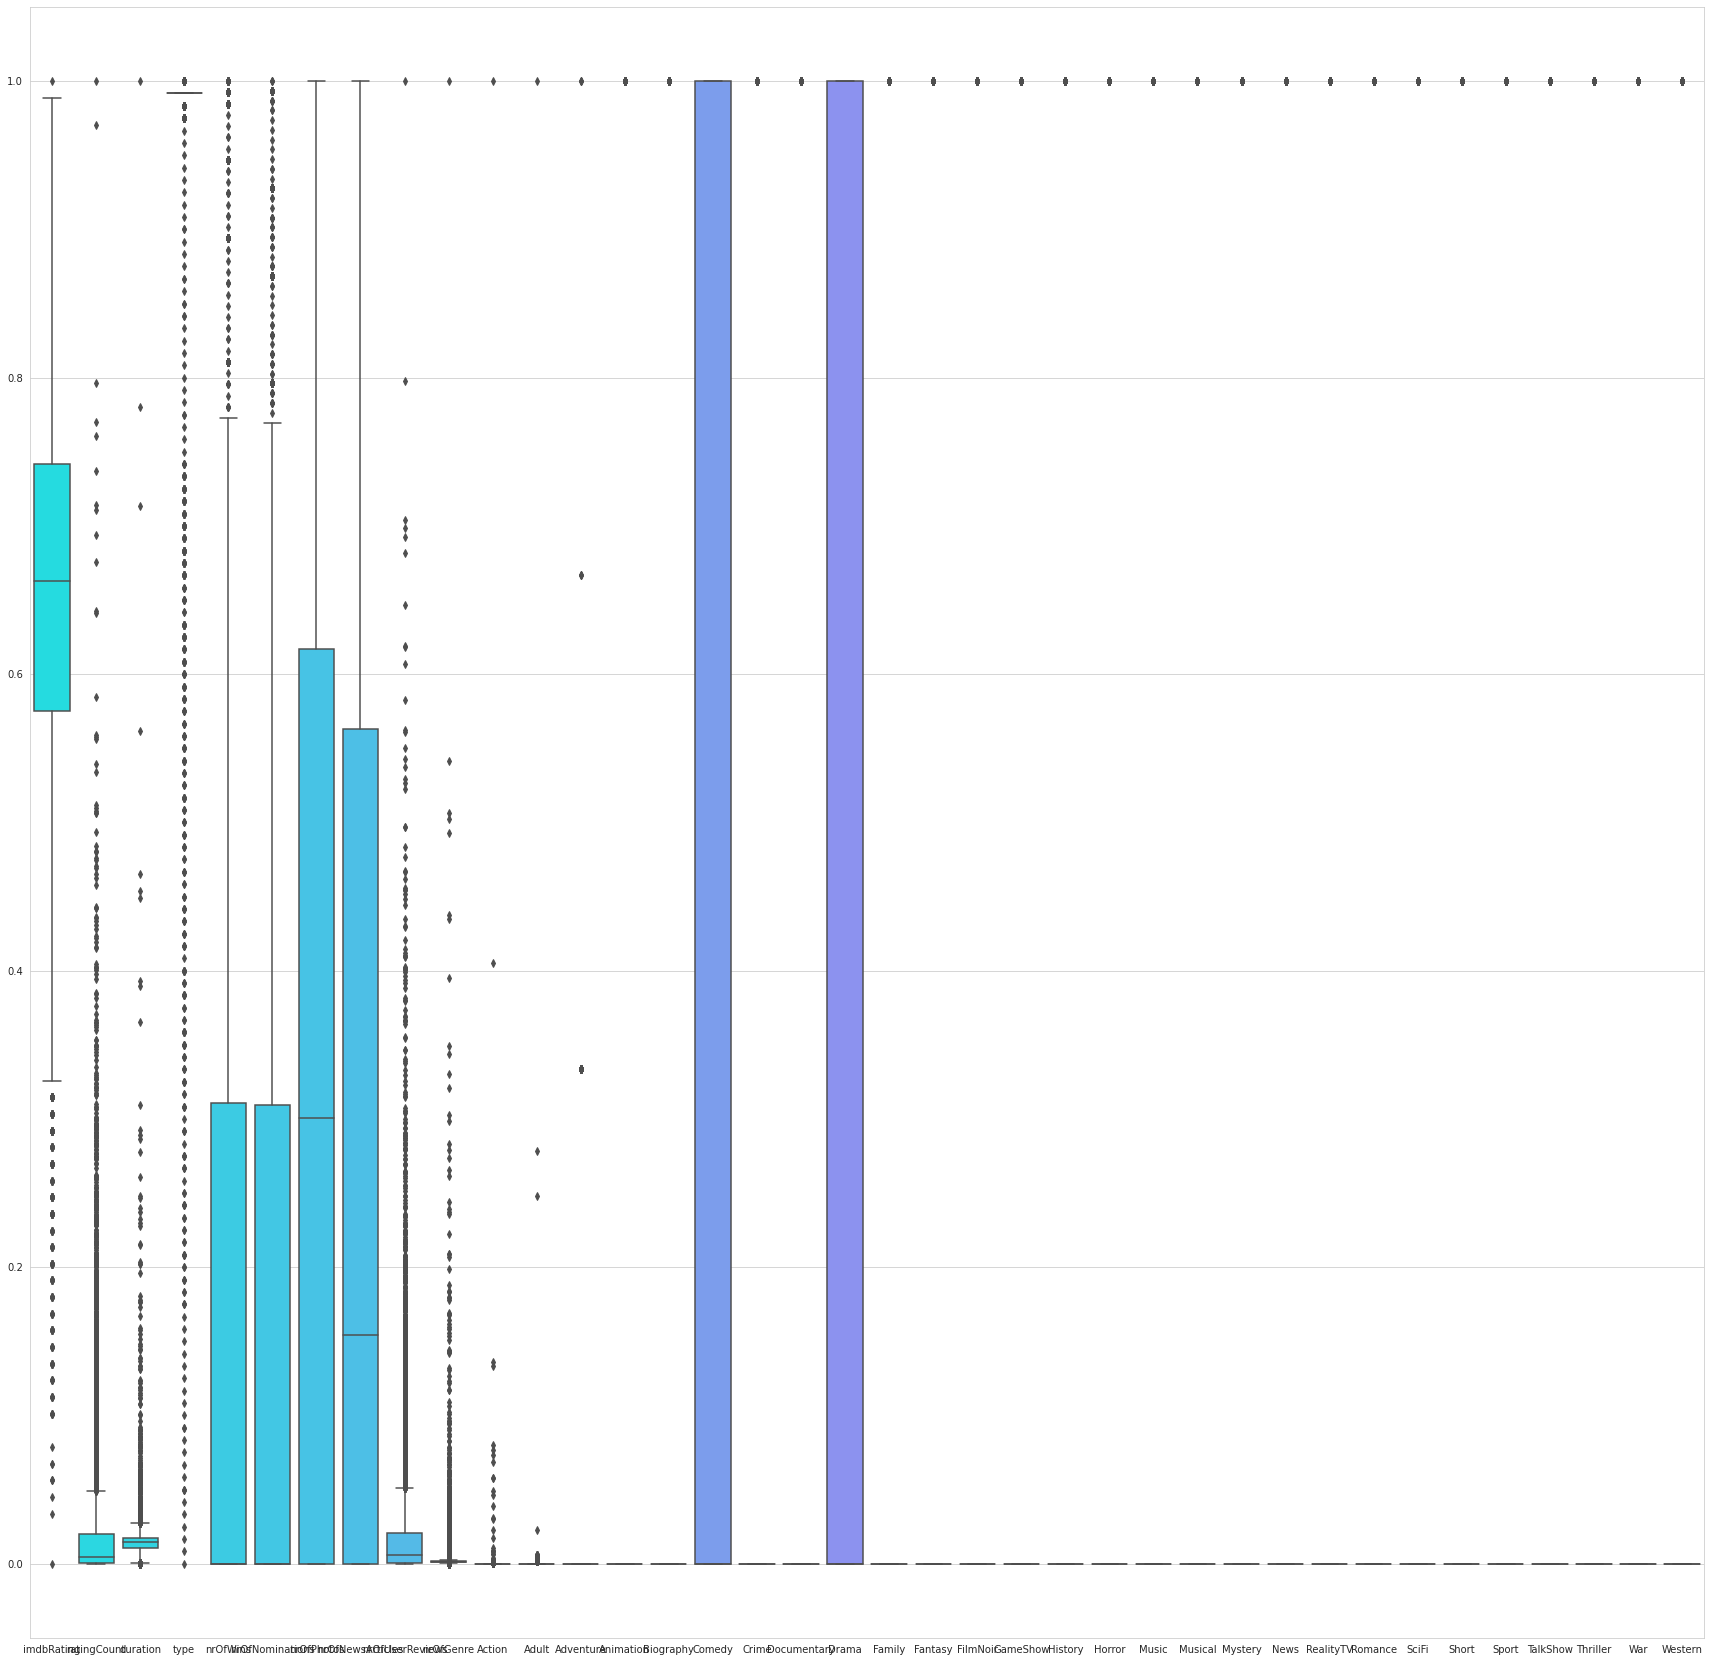

In [17]:
# Box plot

plt.figure(figsize=(30,30))
sns.boxplot(data = df, palette = 'cool')

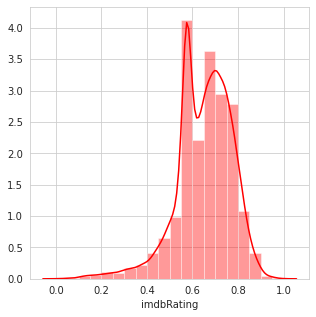

In [18]:
# Dist plot

plt.figure(figsize=(5,5))
sns.distplot(df['imdbRating'], bins=20, color='red')

In [19]:
# Heat map

df.corr()

,imdbRating,ratingCount,duration,type,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,FilmNoir,GameShow,History,Horror,Music,Musical,Mystery,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
imdbRating,1.000000,0.157109,-0.013455,0.097743,0.148792,0.163294,0.059329,0.040417,0.100713,-0.047260,-0.014206,-0.008585,-0.015286,0.079898,0.074333,-0.009124,0.032481,0.041055,0.217809,-0.059319,-0.049932,0.041180,-0.023675,0.085868,-0.181833,0.006521,0.005388,0.047782,-0.069137,-0.041186,0.029265,-0.092126,-0.026258,-0.003755,-0.086685,-0.054248,0.077337,0.004365
ratingCount,0.157109,1.000000,0.055869,0.013719,0.240690,0.307298,0.227754,0.191819,0.804646,-0.004121,0.001827,-0.000690,0.128383,-0.020391,0.014054,-0.052542,0.072329,-0.096352,0.020781,-0.034142,0.093593,-0.033684,-0.024305,-0.019855,-0.005883,-0.033476,-0.040053,0.057306,-0.016970,-0.026699,-0.007275,0.084291,-0.066608,0.003087,-0.029238,0.136420,-0.022844,-0.032958
duration,-0.013455,0.055869,1.000000,-0.215598,0.207783,0.087732,0.085757,0.132746,0.166995,0.713563,0.005036,0.001302,0.006602,-0.052507,0.042883,-0.091942,0.068801,-0.013204,0.059539,0.044405,0.015678,0.041677,-0.047093,0.045583,-0.004621,0.006014,0.018508,0.001843,0.029499,-0.031490,0.031988,0.032730,-0.077348,0.012757,-0.042745,0.019115,0.064240,0.018992
type,0.097743,0.013719,-0.215598,1.000000,-0.425697,-0.005611,0.091083,-0.011375,0.015484,-0.390462,-0.120743,-0.122858,0.040929,-0.038631,-0.021820,0.092768,-0.115834,-0.027102,0.110592,-0.166713,-0.027975,-0.064282,0.009529,0.025050,0.017284,-0.015135,-0.009033,0.024621,-0.054757,0.009998,0.056174,-0.057891,-0.008440,-0.024098,0.001314,0.038900,-0.020739,-0.020296
nrOfWins,0.148792,0.240690,0.207783,-0.425697,1.000000,0.451387,0.164678,0.211518,0.243346,0.217847,0.031849,0.029845,-0.009160,-0.016461,0.082091,-0.095964,0.099859,-0.068210,0.145655,0.079394,0.042257,-0.002928,-0.033029,0.031765,-0.033352,-0.002669,0.013134,0.010455,-0.004958,-0.018806,0.038102,0.011676,-0.070816,0.010962,-0.084322,0.021549,0.045943,-0.017126
nrOfNominations,0.163294,0.307298,0.087732,-0.005611,0.451387,1.000000,0.264594,0.279261,0.318551,0.046650,0.038361,0.012010,0.053037,-0.041806,0.082389,-0.041425,0.040474,-0.077965,0.176732,0.020466,0.058717,-0.043395,-0.020816,0.041693,-0.016755,0.002318,-0.009567,0.036641,-0.033495,-0.005769,0.062393,-0.007314,-0.102472,0.000845,-0.079788,0.069496,0.022074,-0.031790
nrOfPhotos,0.059329,0.227754,0.085757,0.091083,0.164678,0.264594,1.000000,0.443297,0.260496,0.009643,0.011020,0.022765,0.139698,0.002638,0.026493,-0.017900,0.101499,-0.174476,0.178912,0.001344,0.059459,0.032603,-0.092930,0.009554,0.061598,-0.053063,0.002915,0.079776,-0.094648,-0.041425,0.093646,0.054054,-0.142947,0.029263,-0.178274,0.126807,0.023495,0.027071
nrOfNewsArticles,0.040417,0.191819,0.132746,-0.011375,0.211518,0.279261,0.443297,1.000000,0.249069,0.070351,0.005819,0.000226,0.088993,-0.024259,0.055569,-0.042043,0.098455,-0.149134,0.169658,0.017706,0.060159,0.019390,-0.078132,0.018317,0.082464,-0.028218,-0.005924,0.066293,-0.066806,-0.027731,0.077828,0.061916,-0.128105,0.036099,-0.150176,0.113755,0.029648,0.015979
nrOfUserReviews,0.100713,0.804646,0.166995,0.015484,0.243346,0.318551,0.260496,0.249069,1.000000,0.081851,-0.001411,-0.003978,0.133227,-0.046848,0.003874,-0.094860,0.053716,-0.108347,0.050802,-0.033733,0.104779,-0.014209,-0.047224,-0.008893,0.075419,-0.033552,-0.021155,0.088813,-0.041813,-0.037324,0.012510,0.119511,-0.076575,-0.002257,-0.082876,0.158590,-0.002550,-0.024286
nrOfGenre,-0.047260,-0.004121,0.713563,-0.390462,0.217847,0.046650,0.009643,0.070351,0.081851,1.000000,0.091506,0.032050,-0.019117,0.026436,0.001475,-0.049720,0.060346,0.017867,-0.056991,0.105178,0.026888,0.047464,-0.009367,-0.012613,-0.007301,0.035328,-0.005968,-0.010710,0.061087,-0.009010,-0.023384,0.038209,0.033659,-0.008026,-0.013272,-0.020187,0

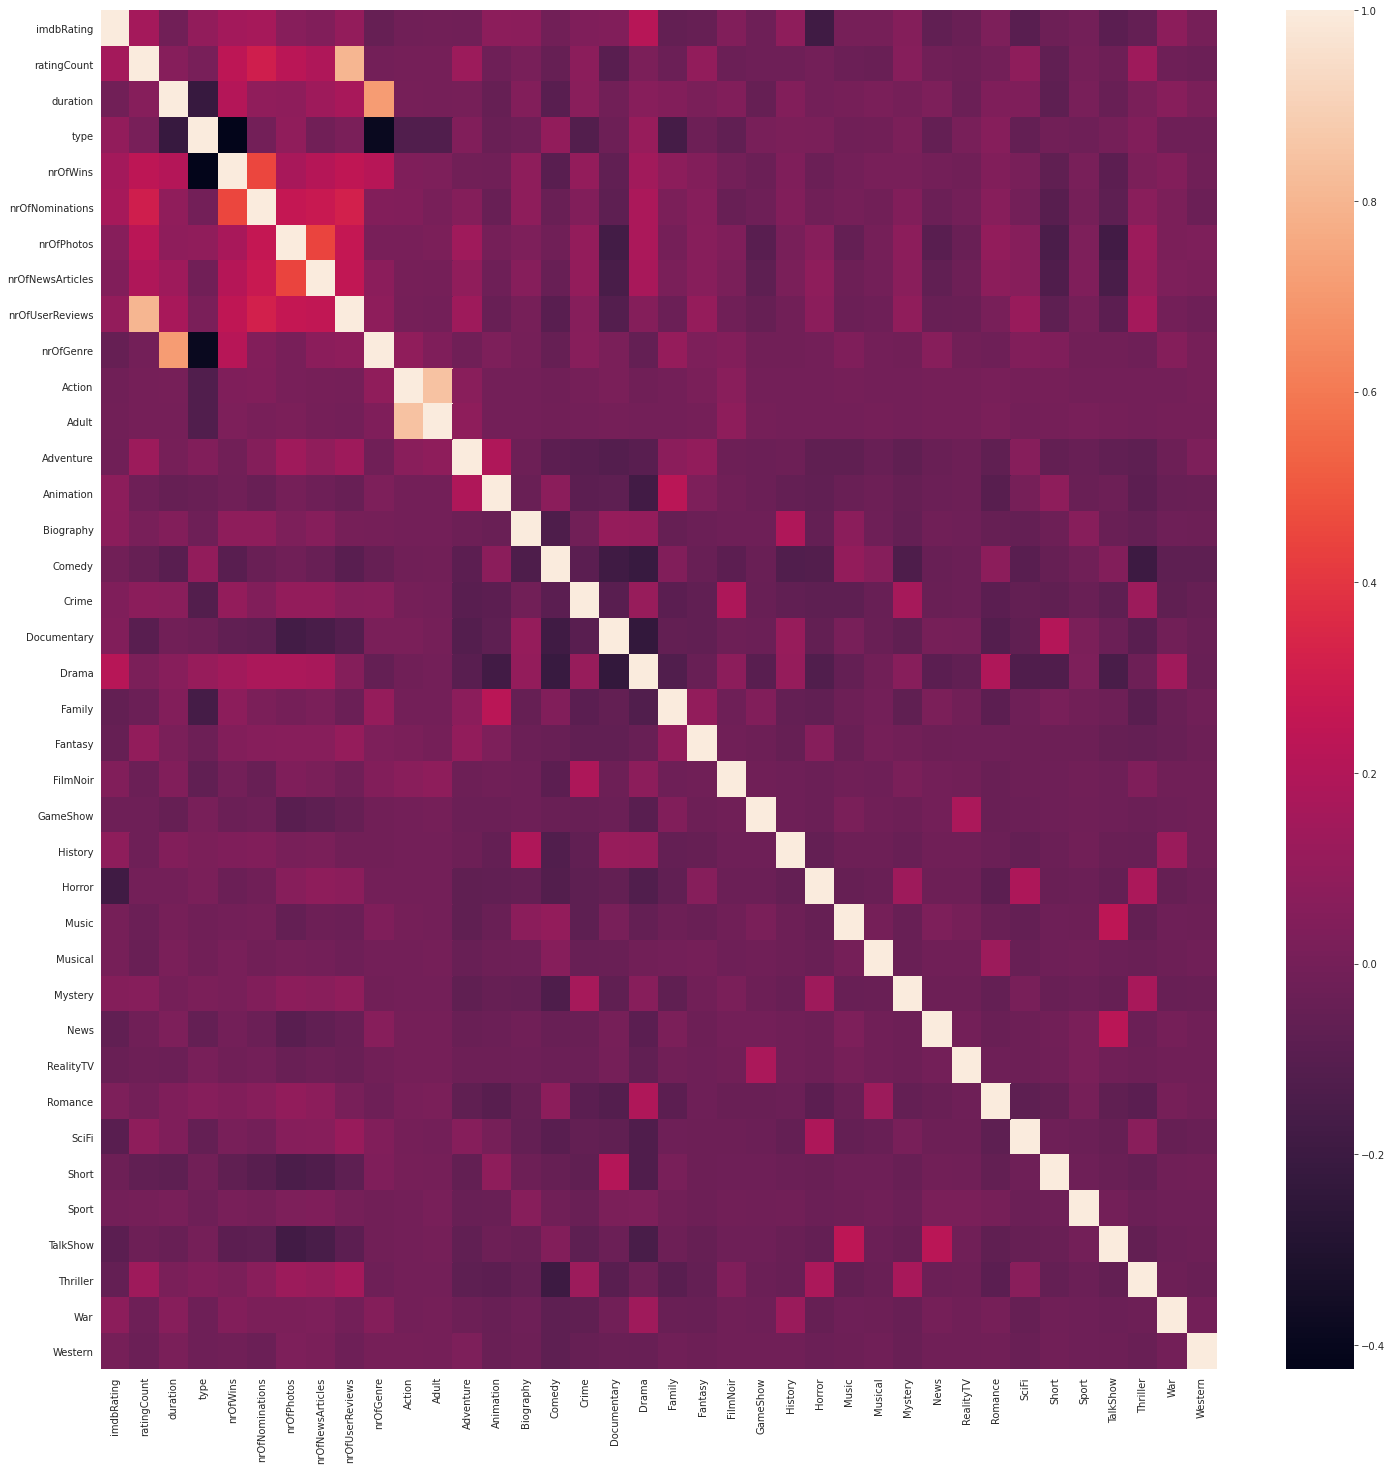

In [20]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr())

# **3. K-Means Clustering**

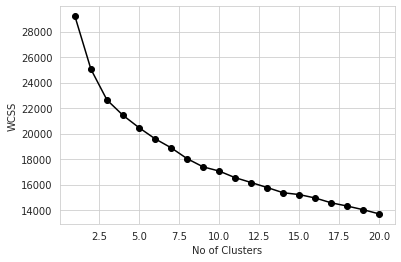

In [21]:
WCSS = []

for i in range(1,21):
    kmeans_algo = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=2)
    kmeans_algo.fit(df)
    WCSS.append(kmeans_algo.inertia_)

# Elbow curve to find k-value
plt.plot(range(1,21),WCSS,marker='o',c='k')
plt.ylabel('WCSS')
plt.xlabel('No of Clusters')
plt.show()

In [22]:
# Final k-value = 14 decided from elbow curve
k_cluster_model = KMeans(n_clusters=15, init='k-means++', max_iter=300, n_init=10, random_state=2)

# Training the model
k_cluster_model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [23]:
# To see no of clusters.
k_cluster_model.n_clusters

15

In [24]:
# Centroids of those 15 clusters
k_cluster_model.cluster_centers_

array([[ 6.66660624e-01,  4.99849671e-03,  1.35464975e-02,
         9.75000000e-01,  8.53548438e-02,  7.34251432e-02,
         1.31630891e-01,  1.13098955e-01,  3.42233867e-03,
         2.85638369e-03,  7.78096951e-04,  7.43226026e-05,
         2.87852619e-04,  3.45423143e-03,  1.20034542e-01,
         4.40414508e-02,  2.50431779e-02,  1.00000000e+00,
         7.77202073e-03,  1.98618307e-02,  4.31778929e-03,
         1.72711572e-03,  8.63557858e-04,  1.15716753e-01,
         1.38169257e-02,  4.40414508e-02,  4.31778929e-03,
         4.31778929e-03,  1.38169257e-02,  6.90846287e-03,
         8.63557858e-04,  2.59067358e-03,  1.77892919e-01,
         2.76338515e-02,  1.72711572e-02,  1.94289029e-15,
         2.41796200e-02,  1.72711572e-03],
       [ 6.57455839e-01,  4.86786924e-02,  1.69903381e-02,
         9.87065561e-01,  2.02579707e-01,  2.19404777e-01,
         4.78935882e-01,  3.92274274e-01,  4.25492014e-02,
         1.68955661e-03,  1.63912285e-04,  2.42793878e-06,
         1.65

In [25]:
# Prediction of the model
kcluster_prediction = k_cluster_model.predict(df)
kcluster_prediction

array([ 8,  2,  4, ...,  6,  5, 14], dtype=int32)

----The End----